In [33]:
# Esse projeto tem como objetico classificar em grupos frases que contem descrição de atividades bancarias usando embeddings.

import pandas as pd
import random
from faker import Faker

fake = Faker()

# Função para gerar descrições únicas
def gerar_descricao_unica(existentes):
    while True:
        acoes = ["consultar saldo", "realizar transferência", "pagar boleto", "aplicar em investimento",
                 "solicitar empréstimo", "alterar dados cadastrais", "emitir extrato", "bloquear cartão",
                 "consultar extrato", "realizar depósito"]
        detalhes = ["na conta corrente", "para outra conta", "no valor de R$ 500,00", "com vencimento em 30 dias",
                    "no fundo de renda fixa", "com taxa de 1,5% ao mês", "para atualizar o endereço",
                    "devido a perda do cartão", "dos últimos 30 dias", "em espécie"]
        descricao = f"Cliente {fake.name()} {random.choice(acoes)} {random.choice(detalhes)}."
        if descricao not in existentes:
            existentes.add(descricao)
            return descricao

# Gerar 500 descrições únicas
descricoes_unicas = set()
dados = [gerar_descricao_unica(descricoes_unicas) for _ in range(500)]

# Criar DataFrame
df = pd.DataFrame(dados, columns=["Descrição"])

# Verificar unicidade
if df['Descrição'].nunique() == len(df):
    print("Todos os casos são únicos!")
else:
    print("Há descrições duplicadas.")

# Exibir as primeiras 5 linhas
print(df.head())

Todos os casos são únicos!
                                           Descrição
0  Cliente Sarah Guerrero emitir extrato para atu...
1  Cliente Patrick Hall realizar transferência co...
2  Cliente Rodney Newman alterar dados cadastrais...
3  Cliente Kelly Lawrence bloquear cartão para at...
4  Cliente Megan Juarez pagar boleto com taxa de ...


In [34]:
df_modelo_filtrado = df

In [35]:
df = df_modelo_filtrado['Descrição'].to_list()

In [ ]:
df

In [37]:
# criando embeddings
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(df)

print(embeddings)

[[-0.06153324 -0.01742732 -0.07859971 ...  0.03463872 -0.01760376
  -0.00868997]
 [-0.09541279  0.03231466 -0.08955079 ...  0.09540273 -0.02013377
  -0.04737172]
 [-0.03047845  0.01390781 -0.07669255 ...  0.04377202  0.00624008
  -0.04345017]
 ...
 [-0.11209425  0.06180489 -0.03057018 ... -0.09758388 -0.01150609
  -0.02379572]
 [-0.03750463  0.07564333 -0.01616195 ... -0.04153838 -0.03374927
  -0.04196351]
 [-0.04350476  0.01791751 -0.07090811 ...  0.03064061  0.00183608
  -0.01359758]]


In [38]:
embeddings.shape

(500, 384)

In [39]:
print(embeddings)

[[-0.06153324 -0.01742732 -0.07859971 ...  0.03463872 -0.01760376
  -0.00868997]
 [-0.09541279  0.03231466 -0.08955079 ...  0.09540273 -0.02013377
  -0.04737172]
 [-0.03047845  0.01390781 -0.07669255 ...  0.04377202  0.00624008
  -0.04345017]
 ...
 [-0.11209425  0.06180489 -0.03057018 ... -0.09758388 -0.01150609
  -0.02379572]
 [-0.03750463  0.07564333 -0.01616195 ... -0.04153838 -0.03374927
  -0.04196351]
 [-0.04350476  0.01791751 -0.07090811 ...  0.03064061  0.00183608
  -0.01359758]]


In [40]:
# Converter embeddings para DataFrame
# Cada embedding é um vetor de 384 dimensões (tamanho do modelo all-MiniLM-L6-v2)
df_embeddings = pd.DataFrame(embeddings)

# Adicionar uma coluna com as frases originais
df_embeddings.insert(0, "Texto", df_modelo_filtrado['Descrição'])

# Exibir o DataFrame
print(df_embeddings.head())

                                               Texto         0         1  \
0  Cliente Sarah Guerrero emitir extrato para atu... -0.061533 -0.017427   
1  Cliente Patrick Hall realizar transferência co... -0.095413  0.032315   
2  Cliente Rodney Newman alterar dados cadastrais... -0.030478  0.013908   
3  Cliente Kelly Lawrence bloquear cartão para at...  0.005116  0.053240   
4  Cliente Megan Juarez pagar boleto com taxa de ... -0.075957  0.035697   

          2         3         4         5         6         7         8  ...  \
0 -0.078600  0.068936 -0.043314 -0.006875  0.044844  0.102014  0.040144  ...   
1 -0.089551 -0.119280 -0.072103  0.016675  0.034950  0.048372  0.018823  ...   
2 -0.076693 -0.023799 -0.073937 -0.049005  0.061352  0.143873  0.014380  ...   
3 -0.077158  0.040847 -0.112872  0.002700  0.008709  0.093588 -0.040659  ...   
4 -0.016865  0.001217 -0.036110 -0.005858  0.076370  0.143248  0.045722  ...   

        374       375       376       377       378       379 

In [41]:
df_embeddings

,Texto,0,1,2,3,4,5,6,7,8,...,374,375,376,377,378,379,380,381,382,383
0,Cliente Sarah Guerrero emitir extrato para atu...,-0.061533,-0.017427,-0.078600,0.068936,-0.043314,-0.006875,0.044844,0.102014,0.040144,...,-0.037239,-0.009097,0.064075,0.048856,-0.041772,0.056092,0.001626,0.034639,-0.017604,-0.008690
1,Cliente Patrick Hall realizar transferência co...,-0.095413,0.032315,-0.089551,-0.119280,-0.072103,0.016675,0.034950,0.048372,0.018823,...,-0.020419,-0.017540,-0.011843,0.000584,-0.013714,-0.000384,0.027644,0.095403,-0.020134,-0.047372
2,Cliente Rodney Newman alterar dados cadastrais...,-0.030478,0.013908,-0.076693,-0.023799,-0.073937,-0.049005,0.061352,0.143873,0.014380,...,-0.075894,-0.019810,0.077139,0.026568,-0.081963,-0.001676,0.062641,0.043772,0.006240,-0.043450
3,Cliente Kelly Lawrence bloquear cartão para at...,0.005116,0.053240,-0.077158,0.040847,-0.112872,0.002700,0.008709,0.093588,-0.040659,...,0.007586,0.006705,0.049014,0.045480,-0.028661,0.061088,0.028636,0.027144,-0.075820,-0.006784
4,Cliente Megan Juarez pagar boleto com taxa de ...,-0.075957,0.035697,-0.016865,0.001217,-0.036110,-0.005858,0.076370,0.143248,0.045722,...,-0.086720,-0.013948,0.065932,-0.017249,-0.054991,0.022863,0.024084,0.043716,0.049668,-0.024865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Cliente Margaret Harper consultar extrato no v...,-0.095228,0.047197,-0.011842,-0.000796,-0.086988,0.039941,0.032192,0.110622,0.044597,...,-0.054123,0.039457,0.027931,0.024077,-0.083461,0.009187,-0.044220,-0.096727,-0.033956,-0.024582
496,Cliente James Stewart realizar depósito para a...,0.013725,0.032305,-0.092092,0.040375,-0.094813,-0.009420,0.059811,0.044825,-0.016487,...,0.043774,-0.040445,0.037248,0.049962,-0.019184,0.037916,0.009376,0.072465,-0.063627,0.012622
497,Cliente Allison Walton consultar extrato no va...,-0.112094,0.061805,-0.030570,0.009885,-0.073702,0.062316,-0.001828,0.123149,0.016988,...,-0.040830,-0.014091,0.043484,0.003781,-0.062107,0.039320,-0.001677,-0.097584,-0.011506,-0.023796
498,Cliente Joseph Edwards consultar saldo no fund...,-0.037505,0.075643,-0.016162,0.037216,-0.099412,0.010049,0.009556,0.068684,0.045694,...,0.004367,-0.017201,0.066461,-0.004485,0.002299,0.011658,0.040440,-0.041538,-0.033749,-0.041964


In [42]:
# prompt: treine um modelo de clusterizacao kmeans
# para esse dataframe removendo a coluna de descricao

from sklearn.cluster import KMeans

# Remove a coluna de descrição
df_embeddings_sem_descricao = df_embeddings.drop(columns=["Texto"])

# Define o número de clusters desejado (ajuste conforme necessário)
num_clusters = 5

# Cria e treina o modelo KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=10)
kmeans.fit(df_embeddings_sem_descricao)

# Obtém os rótulos de cluster para cada ponto de dados
labels = kmeans.labels_

# Adiciona os rótulos de cluster ao DataFrame original
df_embeddings['Cluster'] = labels

# Exibe o DataFrame com os rótulos de cluster
print(df_embeddings.head())


                                               Texto         0         1  \
0  Cliente Sarah Guerrero emitir extrato para atu... -0.061533 -0.017427   
1  Cliente Patrick Hall realizar transferência co... -0.095413  0.032315   
2  Cliente Rodney Newman alterar dados cadastrais... -0.030478  0.013908   
3  Cliente Kelly Lawrence bloquear cartão para at...  0.005116  0.053240   
4  Cliente Megan Juarez pagar boleto com taxa de ... -0.075957  0.035697   

          2         3         4         5         6         7         8  ...  \
0 -0.078600  0.068936 -0.043314 -0.006875  0.044844  0.102014  0.040144  ...   
1 -0.089551 -0.119280 -0.072103  0.016675  0.034950  0.048372  0.018823  ...   
2 -0.076693 -0.023799 -0.073937 -0.049005  0.061352  0.143873  0.014380  ...   
3 -0.077158  0.040847 -0.112872  0.002700  0.008709  0.093588 -0.040659  ...   
4 -0.016865  0.001217 -0.036110 -0.005858  0.076370  0.143248  0.045722  ...   

        375       376       377       378       379       380 

In [43]:
# prompt: calcule a silluete score do meu modelo

from sklearn.metrics import silhouette_score

# Calcula a pontuação da silhueta
silhouette_avg = silhouette_score(df_embeddings_sem_descricao, labels)

# Imprime a pontuação da silhueta
print(f"A pontuação da silhueta para o modelo KMeans com {num_clusters} clusters é: {silhouette_avg}")


A pontuação da silhueta para o modelo KMeans com 5 clusters é: 0.1183738112449646


Para n_clusters = 2, a pontuação da silhueta é 0.10572328418493271
Para n_clusters = 3, a pontuação da silhueta é 0.08543889224529266
Para n_clusters = 4, a pontuação da silhueta é 0.09525303542613983
Para n_clusters = 5, a pontuação da silhueta é 0.1183738112449646
Para n_clusters = 6, a pontuação da silhueta é 0.12942618131637573
Para n_clusters = 7, a pontuação da silhueta é 0.1423841118812561
Para n_clusters = 8, a pontuação da silhueta é 0.14675372838974
Para n_clusters = 9, a pontuação da silhueta é 0.1516319066286087
Para n_clusters = 10, a pontuação da silhueta é 0.1513068825006485
Para n_clusters = 11, a pontuação da silhueta é 0.15664798021316528
Para n_clusters = 12, a pontuação da silhueta é 0.1574670970439911
Para n_clusters = 13, a pontuação da silhueta é 0.15135334432125092
Para n_clusters = 14, a pontuação da silhueta é 0.1523171067237854
Para n_clusters = 15, a pontuação da silhueta é 0.14750191569328308
Para n_clusters = 16, a pontuação da silhueta é 0.140169590711593

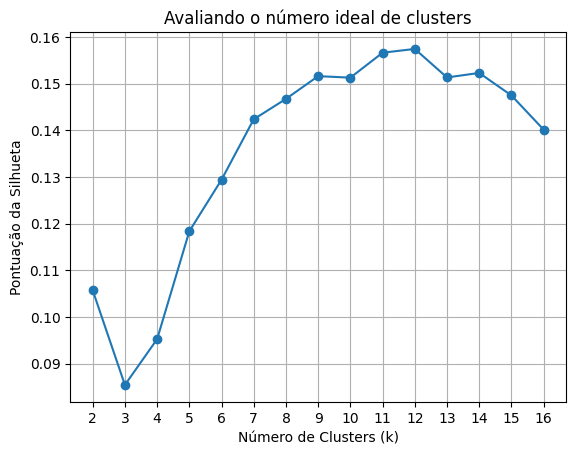

O melhor valor de k (com base na pontuação da silhueta) é: 12


In [45]:
# prompt: cria uma avaliacao para encontrar o melhor numero de k com silluet score e plote isso graficamente

# Avaliando diferentes valores de k com Silhouette Score

range_n_clusters = range(2, 17)  # Testando k de 2 a 10
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
    cluster_labels = kmeans.fit_predict(df_embeddings_sem_descricao)
    silhouette_avg = silhouette_score(df_embeddings_sem_descricao, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Para n_clusters = {n_clusters}, a pontuação da silhueta é {silhouette_avg}")

# Plotando os resultados
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Pontuação da Silhueta")
plt.title("Avaliando o número ideal de clusters")
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

# Encontrando o melhor k
best_k = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"O melhor valor de k (com base na pontuação da silhueta) é: {best_k}")


In [46]:


import pandas as pd


num_clusters = 12

kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=10)
kmeans.fit(df_embeddings_sem_descricao)

# Adicione os rótulos de cluster ao DataFrame
df_embeddings['Cluster'] = kmeans.labels_

# Salve o DataFrame com os clusters em um arquivo CSV
df_embeddings.to_csv('resultados_modelo_9_clusters.csv', index=False)

print(f"Resultados salvos em 'resultados_modelo_9_clusters.csv'")


Resultados salvos em 'resultados_modelo_9_clusters.csv'


Resultados com redução de dimensionalidade salvos em 'resultados_com_reducao_dimensionalidade.csv'


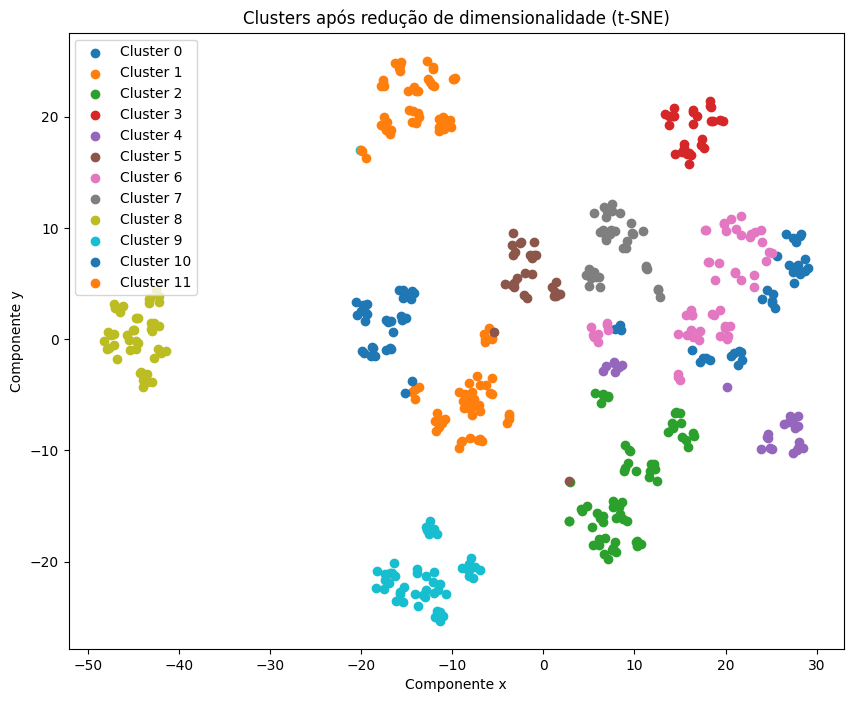

In [47]:

import matplotlib.pyplot as plt

num_clusters = best_k # Use o melhor k encontrado


kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=10)
kmeans.fit(df_embeddings_sem_descricao)

# Adicione os rótulos de cluster ao DataFrame
df_embeddings['Cluster'] = kmeans.labels_

# Redução de Dimensionalidade (t-SNE) para visualização
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)  # Projeta para 2 dimensões
embeddings_2d = tsne.fit_transform(df_embeddings_sem_descricao)

# Adiciona as coordenadas 2D ao DataFrame
df_embeddings['x'] = embeddings_2d[:, 0]
df_embeddings['y'] = embeddings_2d[:, 1]

df_embeddings.to_csv('resultados_com_reducao_dimensionalidade.csv', index=False)

print(f"Resultados com redução de dimensionalidade salvos em 'resultados_com_reducao_dimensionalidade.csv'")

# Plot dos clusters com redução de dimensionalidade
plt.figure(figsize=(10, 8))
for cluster in range(num_clusters):
    plt.scatter(df_embeddings[df_embeddings['Cluster'] == cluster]['x'],
                df_embeddings[df_embeddings['Cluster'] == cluster]['y'],
                label=f'Cluster {cluster}')
plt.legend()
plt.title('Clusters após redução de dimensionalidade (t-SNE)')
plt.xlabel('Componente x')
plt.ylabel('Componente y')
plt.show()
